# Funciones Radiales del Hidrógeno

Darío Mitnik


In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Cosas útiles para utilizar luego
from sympy import oo
from __future__ import division 

# Estética
sp.init_printing()
%matplotlib inline

#Definimos los simbolos que vamos a usar.

r=sp.Symbol('r',positive=True)
l=sp.Symbol('l',positive=True,integer=True)
n=sp.Symbol('n',positive=True,integer=True)
z=sp.Symbol('z',positive=True,integer=True)
k=sp.Symbol('k',positive=True)

In [2]:
# Función Radial Hidrogénica (con hipergeométricas)

def R_hyp(n,l,z,r):
    rho=2*r*z/n 
    rnum = (2*z/n)**3 * sp.factorial(n+l)
    rden = (sp.factorial(2*l+1))**2 * 2*n * sp.factorial(n-l-1)
    rnorm = sp.sqrt(rnum/rden)
    rfunc = (rho)**l * sp.exp(-rho/2) * sp.hyper((-n+l+1,),(2*l+2,),(rho))
    R = rnorm * rfunc
    return R


In [11]:
# Definición de los vectores para plotear

nsize=500
xmax=10.0
xmin=0.
x = np.linspace(xmin,xmax,nsize)
psi = np.zeros(nsize)
psi2 = np.zeros(nsize)

In [15]:
# Copiamos el array simbólico a numérico

for i in range(nsize):
    psi[i] = R_hyp(1,0,1,x[i])
    psi2[i] = R_hyp(2,0,1,x[i])

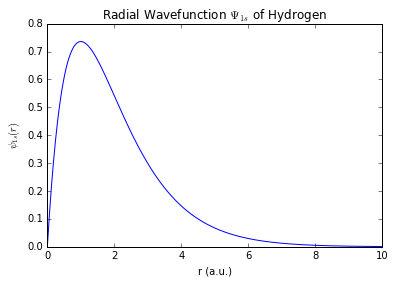

In [13]:
# Ploteo

plt.plot(x,x*psi);
plt.title("Radial Wavefunction $\Psi_{1s}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");


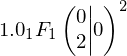

In [6]:
# Integral simbólica

sp.integrate( (r * R_hyp(1,0,1,r))**2, (r,0,oo))

In [7]:
# Chequear que esta normalizada
sp.integrate((r * R_hyp(1,0,1,r))**2, (r,0,oo)).evalf()

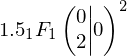

In [23]:
#Valor medio del fundamental
# <r>

sp.integrate(r * (r * R_hyp(1,0,1,r))**2, (r,0,oo))

In [24]:
sp.integrate(r * (r * R_hyp(1,0,1,r))**2, (r,0,oo)).evalf()

In [27]:
#Valor medio del fundamental
# <r**(-1)>

sp.integrate(r**(-1.) * (r * R_hyp(1,0,1,r))**2, (r,0,oo))

In [29]:
#Valor medio del fundamental
# <r**2>

print(sp.integrate(r**2 * (r * R_hyp(1,0,1,r))**2, (r,0,oo)))
print(sp.integrate(r**2 * (r * R_hyp(1,0,1,r))**2, (r,0,oo)).evalf())

3.0*hyper((0,), (2,), 0)**2
3.00000000000000


# Ejercicios:

* Generar otras funciones de onda
* Chequear ortonormalidad
* Calcular los valores medio $\langle r \rangle$, $\langle r^2 \rangle$, 
  $\langle \frac{1}{r} \rangle$ 


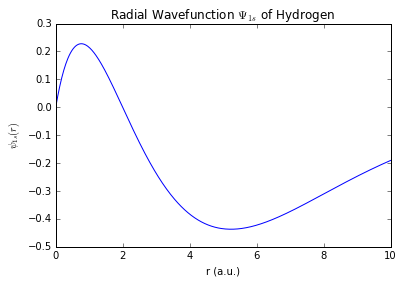

In [16]:
# Plot de psi2 n=2;l=0

plt.plot(x,x*psi2);
plt.title("Radial Wavefunction $\Psi_{1s}$ of Hydrogen");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");

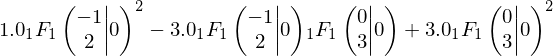

In [17]:
# Integral simbólica

sp.integrate( (r * R_hyp(2,0,1,r))**2, (r,0,oo))

In [18]:
# Chequear que esta normalizada
sp.integrate( (r * R_hyp(2,0,1,r))**2, (r,0,oo)).evalf()

In [21]:
# Valores medios
# <r>

print(sp.integrate(r * (r * R_hyp(2,0,1,r))**2, (r,0,oo))) 
print(sp.integrate(r * (r * R_hyp(2,0,1,r))**2, (r,0,oo)).evalf())

3.0*hyper((-1,), (2,), 0)**2 - 12.0*hyper((-1,), (2,), 0)*hyper((0,), (3,), 0) + 15.0*hyper((0,), (3,), 0)**2
6.00000000000000


In [22]:
# Valores medios
# <r**2>

print(sp.integrate(r**2 * (r * R_hyp(2,0,1,r))**2, (r,0,oo))) 
print(sp.integrate(r**2 * (r * R_hyp(2,0,1,r))**2, (r,0,oo)).evalf())

12.0*hyper((-1,), (2,), 0)**2 - 60.0*hyper((-1,), (2,), 0)*hyper((0,), (3,), 0) + 90.0*hyper((0,), (3,), 0)**2
42.0000000000000


In [8]:
#

# Otra forma de hacerlo (con numpy)

In [30]:
from scipy import integrate
from scipy.special import hyp1f1
from math import factorial


In [31]:
def R1F1(n,l,z,r):
    rho=2*r*z/n 
    rnum = (2*z/n)**3 * factorial(n+l)
    rden = (factorial(2*l+1))**2 * 2*n * factorial(n-l-1)
    rnorm = np.sqrt(rnum/rden)
    rfunc = (rho)**l * np.exp(-rho/2) * hyp1f1(-n+l+1,2*l+2,rho)
    R = rnorm * rfunc
    return R 

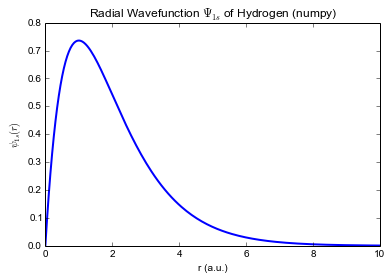

In [32]:
r = np.linspace(0,10,200);
plt.plot(r,r*R1F1(1,0,1,r),'-',label='R1F1',linewidth=2);
plt.title("Radial Wavefunction $\Psi_{1s}$ of Hydrogen (numpy)");
plt.xlabel("r (a.u.)");
plt.ylabel("$\psi_{1s}(r)$");


In [33]:
# Integral

rR2=lambda r:(R1F1(1,0,1,r) * r)**2 
Integral=integrate.quad(rR2,0,float('inf'))
print(Integral)

(1.0000000000000002, 1.3633023322217214e-10)
